<a href="https://colab.research.google.com/github/romanzes637/Hoek-Brown/blob/master/Hoek_Brown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SymPy
https://www.sympy.org/en/features.html

**Calculus**

* Limits: limit(x*log(x), x, 0) -> 0

* Differentiation

* Integration: It uses extended Risch-Norman heuristic

* Taylor (Laurent) series

**Solving**

* Polynomial equations

* Algebraic equations

* Differential equations

* Difference equations

* Systems of equations

* Diophantine equations: x2 − 4xy + 8y2 − 3x + 7y = 5, 2x + 3y = 5

...

# LaTeX to Word by MathType
http://www.dessci.com/en/products/mathtype/popup_tex_in_word.htm

# Hoek-Brown in principal stresses
https://en.wikipedia.org/wiki/Hoek%E2%80%93Brown_failure_criterion

$\sigma_1=\sigma_3+\sqrt{A\sigma_3+B^2}$

 $\sigma_1$ - major principal stress
 
 $\sigma_3$ - minor principal stress
 
$A= \dfrac{C_0^2-T_0^2}{T_0}$ - material constant

$B = C_0$ - material constant

 $T_0$ - Uniaxial Tensile Strength (UCS)
 
 $C_0$ - Ultimate (Uniaxial) Compressive Strength (UTS)

# Hoek-Brown in mean stresses
https://en.wikipedia.org/wiki/Hoek%E2%80%93Brown_failure_criterion

$\tau_m=\frac{1}{2}(\sigma_1-\sigma_3)$ - mean shear stress

$\sigma_m=\frac{1}{2}(\sigma_1+\sigma_3)$ - mean normal stress

$\tau_m=\frac{1}{2}\sqrt{A(\sigma_m-\tau_m)+B^2}$

$\tau_m=\frac{1}{8}(-A\pm\sqrt{A^2+16(A\sigma_m + B^2}))$

# Generalized Hoek-Brown in principal stresses
https://www.rocscience.com/help/rocdata/rocdata/Generalized_Hoek-Brown_Criterion.htm

$\sigma_1=\sigma_3+\sigma_{ci}\left(m_b\dfrac{\sigma_3}{\sigma_{ci}}+s\right)^a$

$\sigma_1$ - major principal stress

$\sigma_3$ - minor principal stress

$\sigma_{ci}$ - Uniaxial Compressive Strength (UCS) of the intact rock material

$m_b$ - reduced value of the material constant $m_i$ (for the intact rock)}

$s$ and $ a$ - constants depend upon the characteristics of the rock mass

$m_b=m_i\exp\left(\dfrac{GSI-100}{28-4D}\right)$

$s=\exp\left(\dfrac{GSI-100}{9-3D}\right)$

$a=\dfrac{1}{2}+\dfrac{1}{6}\left[\exp\left(-\dfrac{GSI}{15}\right)-\exp\left(-\dfrac{20}{3}\right)\right]$

$GSI$ -  (Geological Strength Index) relates the failure criterion to geological observations in the field

$m_i$ - material constant for the intact rock

$D$ - "disturbance factor" which depends upon the degree of disturbance to which the rock mass has been subjected by blast damage and/or stress relaxation. It varies from 0 for undisturbed in situ rock masses to 1 for very disturbed rock masses.

# Generalized Hoek-Brown in mean stresses
$\sigma_m=\frac{1}{2}(\sigma_1+\sigma_3)$ - mean normal stress

$\tau_m=\frac{1}{2}(\sigma_1-\sigma_3)$ - mean shear stress

$\sigma_1=\sigma_3+\sigma_{ci}\left(m_b\dfrac{\sigma_3}{\sigma_{ci}}+s\right)^a$

$\tau_m=\frac{1}{2}\sigma_{ci}\left(m_b\dfrac{(\sigma_m-\tau_m)}{\sigma_{ci}}+s\right)^a$

# Mour-Coulomb

$\tau=c+\sigma\tan{\phi}$

$\sigma$ - normal stress

$\tau$ - shear stress

$c$ - cohesion

$\phi$ - angle of internal friction

from Mohr's cirlce

$\sigma =\sigma_m+\tau_m\sin{\phi}$

$\tau =\tau_m\cos{\phi}$

where

$\tau_m=\frac{1}{2}(\sigma_1-\sigma_3)$ - mean normal stress

$\sigma_m=\frac{1}{2}(\sigma_1+\sigma_3)$ - mean shear stress

eventually

$\tau_m=\sigma_m\sin{\phi}+c\cos{\phi}$



In [0]:
import sympy as sym

def tau():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_mean = sym.Symbol('sigma_m')
  tau_mean = (-a + sym.sqrt(a ** 2 + 16 * (a * sigma_mean + b ** 2))) / 8
#   tau_mean = (-a - sym.sqrt(a ** 2 + 16 * (a * sigma_mean + b * 2))) / 8
  return tau_mean
def d_tau():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_mean = sym.Symbol('sigma_m')
  d_tau_mean = tau().diff(sigma_mean, 1)  # differentiate equation
  # u.integrate(sigma_mean)  # integrate equation
  # sym.solveset(tau_mean, sigma_mean)  # solve equation
  return d_tau_mean
def mc_m():
  c = sym.Symbol('c')
  phi = sym.Symbol('phi')
  sigma_m = sym.Symbol('sigma_m')
  return sigma_m*sym.sin(phi) + c*sym.cos(phi)
def mc_m_np(sigma_m, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_m'), sym.Symbol('c'), sym.Symbol('phi')),
                   mc_m(), 'numpy')
  return f(sigma_m, c, phi)
def mc_m_dist():
  sigma_p = sym.Symbol('sigma_p')
  tau_p = sym.Symbol('tau_p')
  c = sym.Symbol('c')
  phi = sym.Symbol('phi')
  sigma_m = sym.Symbol('sigma_m')
  return ((sigma_p - sigma_m)**2 + (tau_p - mc_m())**2)**0.5
def mc_m_dist_np(sigma_p, tau_p, sigma_m, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('c'), sym.Symbol('phi')), 
                   mc_m_dist(), 'numpy')
  return f(sigma_p, tau_p, sigma_m, c, phi)
def d_mc_m_dist():
  sigma_m = sym.Symbol('sigma_m')
  return sym.diff(mc_m_dist(), sigma_m, 1)
def d_mc_m_dist_np(sigma_p, tau_p, sigma_m, c, phi):
  f = sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('c'), sym.Symbol('phi')), 
                   d_mc_m_dist(), 'numpy')
  return f(sigma_p, tau_p, sigma_m, c, phi)
def hb_m():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_m = sym.Symbol('sigma_m')
  tau_m = sym.Symbol('tau_m')
  e = 0.5*(a*(sigma_m-tau_m) + b**2)**0.5 - tau_m
  return sym.solve(e, tau_m)
def hb_m_np():
  fs = [sym.lambdify((sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
        x, 'numpy') for x in hb_m()]
  return fs
def hb_m_dist():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_m = sym.Symbol('sigma_m')
  sigma_p = sym.Symbol('sigma_p')
  tau_p = sym.Symbol('tau_p')
  return [((sigma_p - sigma_m)**2 + (tau_p - x)**2)**0.5 for x in hb_m()]
def hb_m_dist_np():
  fs = [sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
                   x, 'numpy') for x in hb_m_dist()]
  return fs
def d_hb_m():
  sigma_m = sym.Symbol('sigma_m')
  return [sym.diff(x, sigma_m, 1) for x in hb_m()]
def d_hb_m_dist():
  sigma_m = sym.Symbol('sigma_m')
  return [sym.diff(x, sigma_m, 1) for x in hb_m_dist()]
def d_hb_m_dist_np():
  fs = [sym.lambdify((sym.Symbol('sigma_p'), sym.Symbol('tau_p'),
                   sym.Symbol('sigma_m'), sym.Symbol('A'),  sym.Symbol('B')),
                   x, 'numpy') for x in d_hb_m_dist()]
  return fs
def ghb_p():
  m_b = sym.Symbol('m_b')
  sigma_ci = sym.Symbol('sigma_ci')
  a = sym.Symbol('a')
  s = sym.Symbol('s')
  sigma_3 = sym.Symbol('sigma_3')
  sigma_1 = sigma_3 + sigma_ci*(m_b*sigma_3/sigma_ci + s)**a
  return sigma_1
def ghb_m():
  sigma_m = sym.Symbol('sigma_m')
  tau_m = sym.Symbol('tau_m')
  m_b = sym.Symbol('m_b')
  sigma_ci = sym.Symbol('sigma_ci')
  a = sym.Symbol('a')
  s = sym.Symbol('s')
  e = 0.5*sigma_ci*(m_b*(sigma_m-tau_m)/sigma_ci + s)**a - tau_m
  return sym.solve(e, tau_m)
def dist():
  a = sym.Symbol('A')
  b = sym.Symbol('B')
  sigma_mean = sym.Symbol('sigma_m')
  sigma_p = sym.Symbol('sigma_p')
  tau_p = sym.Symbol('tau_p')
  return ((sigma_p - sigma_mean)**2 + (tau_p - (-a + sym.sqrt(a**2 + 16*(a*sigma_mean + b**2))) / 8)**2)**0.5
#   return (sigma_p - sigma_mean)**2 + (tau_p - (-a + sym.sqrt(a**2 + 16*(a*sigma_mean + b**2))) / 8)**2
def d_dist():
  sigma_mean = sym.Symbol('sigma_m')
  return dist().diff(sigma_mean, 1)
def d_dist_solve():
  sigma_mean = sym.Symbol('sigma_m')
  return sym.solveset(d_dist(), sigma_mean)

In [0]:
sym.init_printing()  # clean LaTeX string e.g. for Word

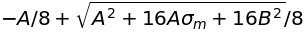

In [954]:
tau()

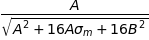

In [955]:
d_tau()

In [0]:
sym.init_printing(use_latex='matplotlib', use_unicode=True)  # rendered LaTeX

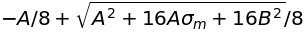

In [957]:
tau()

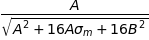

In [958]:
d_tau()

In [959]:
ghb_p()

In [0]:
# ghb_m()

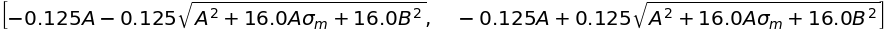

In [961]:
hb_m()

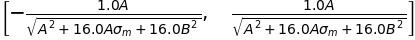

In [962]:
d_hb_m()

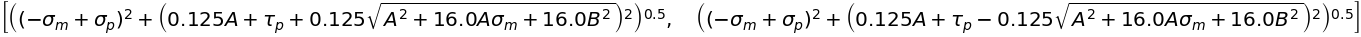

In [963]:
hb_m_dist()

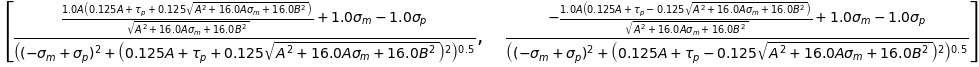

In [964]:
d_hb_m_dist()

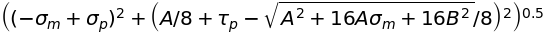

In [965]:
dist()

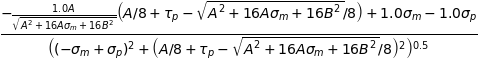

In [966]:
d_dist()

In [0]:
# d_dist_solve()

In [968]:
mc_m()

In [969]:
mc_m_dist()

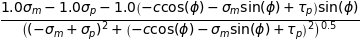

In [970]:
d_mc_m_dist()

In [971]:
# evaluate equation
a = 10
b = 20
sigma_m = 40
r = hb_m()[0].evalf(subs={
    sym.Symbol('A'):a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):sigma_m})
print(r)
r = hb_m()[1].evalf(subs={
    sym.Symbol('A'):a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):sigma_m}) 
print(r)

-15.4472708645007
12.9472708645007


In [0]:
from ipywidgets import interact, interactive, interact_manual
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def plot_hb(min_x=-150, max_x=150, min_y=0, max_y=150, n=151, c0=100, t0=10, 
            sigma_p=0, tau_p=0, width=9, height=9):
  # Curves
#   n = 151  # number of curve points
#   c0 = 100  # Uniaxial Compressive Strength (UCS)
#   t0 = 10  # Uniaxial Tensile Strength (UTS)
  xs = np.linspace(min_x, max_x, n)
  a = (c0 * c0 - t0 * t0) / t0
  b = c0
  ys = [complex(tau().evalf(
      subs={sym.Symbol('A'):a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):x}))
        for x in xs]
  dys = [complex(d_tau().evalf(
      subs={sym.Symbol('A'):a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):x}))
         for x in xs]
  dist_ys = [complex(dist().evalf(
      subs={sym.Symbol('A'):a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):x,
            sym.Symbol('sigma_p'):sigma_p, sym.Symbol('tau_p'):tau_p})) for x in xs]
  ddist_ys = [complex(d_dist().evalf(
      subs={sym.Symbol('A'):a, sym.Symbol('B'):b, sym.Symbol('sigma_m'):x,
            sym.Symbol('sigma_p'):sigma_p, sym.Symbol('tau_p'):tau_p})) for x in xs]
  # Plot
#   width = 9  # inches
#   height = 9  # inches
  plt.figure(figsize=(width, height))
  plt.gca().set_aspect('equal', adjustable='box')
  plt.plot(xs, ys, label='Hoek-Brown', color='red', linewidth=3)
  plt.plot(xs, dys, label='Hoek-Brown derivative', color='blue', linewidth=3)
  plt.plot(xs, dist_ys, label='Hoek-Brown distance', color='green', linewidth=3)
  plt.plot(xs, ddist_ys, label='Hoek-Brown distance derivative', color='m', linewidth=3)
  plt.plot([min_x, max_x], [0, 0], color='black', linewidth=1)
  plt.plot([0, 0], [min_x, max_x], color='black', linewidth=1)
  plt.scatter(sigma_p, tau_p, c='g', s=10**2, marker='o')
  plt.xlim(min_x, max_x)
  plt.ylim(min_y, max_y)
  plt.grid()
  plt.legend()
  plt.xlabel('σm, MPa')
  plt.ylabel('τm, MPa')
  plt.show()
  
# interact_manual(
#           plot_hb,
#           min_x=(-1000, 1000, 1), 
#           max_x=(-1000, 1000, 1),
#           n=(0, 1000, 1),
#           sigma_p=(-1000, 1000, 1),
#           tau_p=(-1000, 1000, 1),
#           c0=(0, 1000, 1),
#           t0=(0, 1000, 1),
#           width=(0, 20, 1), 
#           height=(0, 20, 1)
#         );

In [973]:
def mc_line_criterion(fig, ax, xx, yy, **kwargs):
  color = kwargs['color']
  c = kwargs['c']
  phi = kwargs['phi']
  f = mc_m_np
  ax.plot(xx[0,], f(xx[0,], c, phi), color=color, 
          label='Mohr-Coulomb, c={}, phi={}'.format(c, phi))
  
def hb_line_criterion(fig, ax, xx, yy, **kwargs):
  color = kwargs['color']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  a = (c0 * c0 - t0 * t0) / t0
  b = c0
  f, f2 = hb_m_np()
  ax.plot(xx[0,], f(xx[0,], a, b), color=color,
          label='Hoek-Brown, A={}, B={}, c0={}, t0={}'.format(a, b, c0, t0))
  ax.plot(xx[0,], f2(xx[0,], a, b), color=color)
  
def all_line_criterion(fig, ax, xx, yy, **kwargs):
  cmap = kwargs['cmap']
  t = kwargs['t']
  c = cm.get_cmap(cmap)
  for i, (k, v) in enumerate(line_factory.items()):
    if k[1] == t and k[0] != 'all':
      kwargs['color'] = c(i)
      v(fig, ax, xx, yy, **kwargs)
      
line_factory = {
    ('mohr-coulomb', 'criterion'): mc_line_criterion,
    ('hoek-brown', 'criterion'): hb_line_criterion,
    ('all', 'criterion'): all_line_criterion
}

def draw_line(fig, ax, xx, yy, **kwargs):
  fc = kwargs['fc']
  t = kwargs['t']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  line_factory[(fc, t)](fig, ax, xx, yy, **kwargs) 
  ax.set_xlim(min_x, max_x)
  ax.set_ylim(min_y, max_y)
  ax.legend()
  ax.grid()
  
def draw_image(fig, ax, xx, yy, **kwargs):
  fc = kwargs['fc']
  t = kwargs['t']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  c = kwargs['c']
  cmap = kwargs['cmap']
  phi = kwargs['phi']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  elev = kwargs['elev']
  azim = kwargs['azim']
  if t == 'distance':
    if fc == 'mohr-coulomb':
      zs = list()
      f = mc_m_dist_np
      for x in xx[0,]:
        zs.append(f(xx, yy, x, c, phi))
      zz = np.nanmin(np.array(zs), axis=0)
    elif fc == 'hoek-brown':
      a = (c0 * c0 - t0 * t0) / t0
      b = c0
      zs = list()
      zs2 = list()
      f, f2 = hb_m_dist_np()
      for x in xx[0,]:
        zs.append(f(xx, yy, x, a, b))
        zs2.append(f2(xx, yy, x, a, b))
      Z = np.nanmin(np.array(zs), axis=0)
      Z2 = np.nanmin(np.array(zs2) , axis=0)
      zz = np.nanmin(np.array([Z, Z2]), axis=0)
    ax.set_xlabel('σm, MPa')
    ax.set_ylabel('τm, MPa')
  elif t == 'distance_min_abs_derivative':
    if fc == 'mohr-coulomb':
      zs = list()
      f = d_mc_m_dist_np
      for x in xx[0,]:
        zs.append(f(xx, yy, x, c, phi))
      zz = np.nanmin(np.absolute(np.array(zs)), axis=0)
    elif fc == 'hoek-brown':
      a = (c0 * c0 - t0 * t0) / t0
      b = c0
      zs = list()
      zs2 = list()
      f, f2 = d_hb_m_dist_np()
      for x in xx[0,]:
        zs.append(f(xx, yy, x, a, b))
        zs2.append(f2(xx, yy, x, a, b))
      Z = np.nanmin(np.absolute(np.array(zs)), axis=0)
      Z2 = np.nanmin(np.absolute(np.array(zs2)) , axis=0)
      zz = np.nanmin(np.array([Z, Z2]), axis=0)
  im = ax.imshow(zz, cmap=cmap, origin='lower',
                   extent=[min_x, max_x, min_y, max_y])
  fig.colorbar(im, ax=ax, orientation='horizontal')
  ax.set_xlim(min_x, max_x)
  ax.set_ylim(min_y, max_y)
  
def draw_surface(fig, ax, xx, yy, **kwargs):
  fc = kwargs['fc']
  t = kwargs['t']
  c0 = kwargs['c0']
  t0 = kwargs['t0']
  c = kwargs['c']
  cmap = kwargs['cmap']
  phi = kwargs['phi']
  min_x = kwargs['min_x']
  max_x = kwargs['max_x']
  min_y = kwargs['min_y']
  max_y = kwargs['max_y']
  elev = kwargs['elev']
  azim = kwargs['azim']
  if t == 'distance':
    if fc == 'mohr-coulomb':
      zs = list()
      f = mc_m_dist_np
      for x in xx[0,]:
        zs.append(f(xx, yy, x, c, phi))
      zz = np.nanmin(np.array(zs), axis=0)
    elif fc == 'hoek-brown':
      a = (c0 * c0 - t0 * t0) / t0
      b = c0
      zs = list()
      zs2 = list()
      f, f2 = hb_m_dist_np()
      for x in xx[0,]:
        zs.append(f(xx, yy, x, a, b))
        zs2.append(f2(xx, yy, x, a, b))
      Z = np.nanmin(np.array(zs), axis=0)
      Z2 = np.nanmin(np.array(zs2) , axis=0)
      zz = np.nanmin(np.array([Z, Z2]), axis=0)    
    ax.plot_surface(xx, yy, zz, cmap=cmap, alpha=0.9, 
                     antialiased=False, rcount=200, ccount=200)
    ax.set_zlabel('distance, MPa')
    ax.set_xlabel('σm, MPa')
    ax.set_ylabel('τm, MPa')
  ax.view_init(elev, azim)
  ax.set_xlim(min_x, max_x)
  ax.set_ylim(min_y, max_y)
  
draw = {
    'surface': draw_surface,
    'image': draw_image,
    'line': draw_line
}

def plot_hb_3d(min_x=-150, max_x=150, min_y=0, max_y=150, nx=301, ny=151,
               c0=100, t0=10, c=1., phi=1.,
               width=8, height=8, elev=65, azim=-45, 
               color='black', cmap='tab10',
               fc='all', pt='line', t='criterion'):
  kwargs = locals()
  xs = np.linspace(min_x, max_x, nx)    
  ys = np.linspace(min_y, max_y, ny)
  xx, yy = np.meshgrid(xs, ys)
  fig = plt.figure(figsize=(width, height))
  if pt in ['surface']:
    ax = fig.add_subplot(1, 1, 1, projection='3d')
  else:
    ax = fig.add_subplot(1, 1, 1)
  draw[pt](fig, ax, xx, yy, **kwargs)
  plt.show()
  
interact_manual(plot_hb_3d, 
         min_x=(-2000, 2000, 1), 
         max_x=(-2000, 2000, 1),
         nx=(0, 2000, 1),
         min_y=(-2000, 2000, 1), 
         max_y=(-2000, 2000, 1),
         ny=(0, 2000, 1),
         c0=(0., 2000., 1.),
         t0=(0., 2000., 1.),
         width=(0, 20, 1), 
         height=(0, 60, 1),
         elev=(-180, 180, 1),
         azim=(-180, 180, 1),
         color='black',
         cmap='tab10',
         fc = ['mohr-coulomb', 'hoek-brown', 'all'],
         pt = ['surface', 'image', 'line'],
         t = ['distance', 'distance_min_abs_derivative', 'criterion']
        );

interactive(children=(IntSlider(value=-150, description='min_x', max=2000, min=-2000), IntSlider(value=150, de…